# Gráfico Dedicación por perfil y cliente

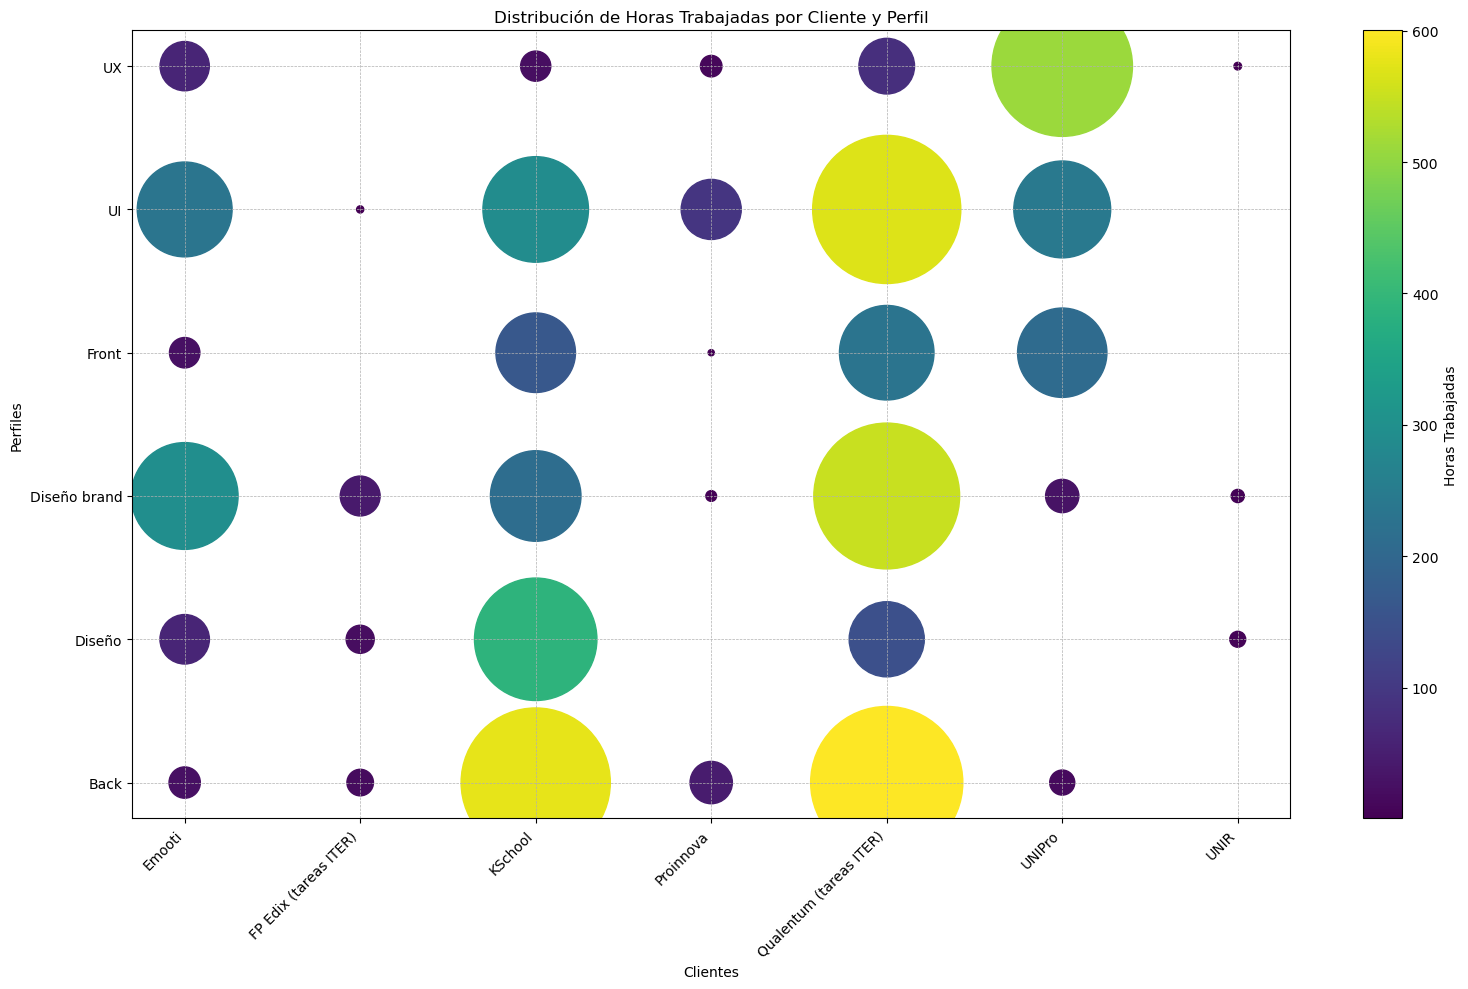

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

# Carga de datos
file_path = './horas.csv'
data = pd.read_csv(file_path)

# Mapeo de nombres de usuarios a sus funciones
profile_mapping = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'esther': 'Front'
}

# Aplicar el mapeo de perfiles
data['Profile'] = data['Username'].map(profile_mapping)

# Convertir 'Start Date' a datetime 
data['Start Text'] = pd.to_datetime(data['Start Date'])

# Calcular horas trabajadas
data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
data['Stop'] = pd.to_datetime(data['Stop'], unit='ms', errors='coerce')
data['Time Spent (hrs)'] = (data['Stop'] - data['Start']).dt.total_seconds() / 3600


# Agrupar datos por 'Folder Name' (cliente), 'Profile' y sumar las horas
grouped_data = data.groupby(['Folder Name', 'Profile'])['Time Spent (hrs)'].sum().reset_index()

# Asignar las horas trabajadas directamente como el tamaño de las burbujas
grouped_data['Bubble Size'] = grouped_data['Time Spent (hrs)']

# Asegurarse de que todos los valores son numéricos y establecer un tamaño mínimo para las burbujas
grouped_data['Bubble Size'] = grouped_data['Bubble Size'].apply(lambda x: max(x, 1))

# Crear la gráfica de burbujas con el tamaño ajustado y marcador de círculos
plt.figure(figsize=(16, 10))
scatter = plt.scatter(grouped_data['Folder Name'], grouped_data['Profile'], s=grouped_data['Bubble Size']*20, alpha=1, c=grouped_data['Time Spent (hrs)'], cmap='viridis', marker='o')

# Añadir títulos y etiquetas
plt.title('Distribución de Horas Trabajadas por Cliente y Perfil')
plt.xlabel('Clientes')
plt.ylabel('Perfiles')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X para mejorar la legibilidad
plt.colorbar(scatter, label='Horas Trabajadas')  # Añadir una barra de color para representar las horas trabajadas
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Mostrar la gráfica
plt.tight_layout()
plt.show()



# Gráfico de Barras por perfil, cliente y horas

/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/3490533661.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/3490533661.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(tareas ITER\)", "", regex=True).str.strip()


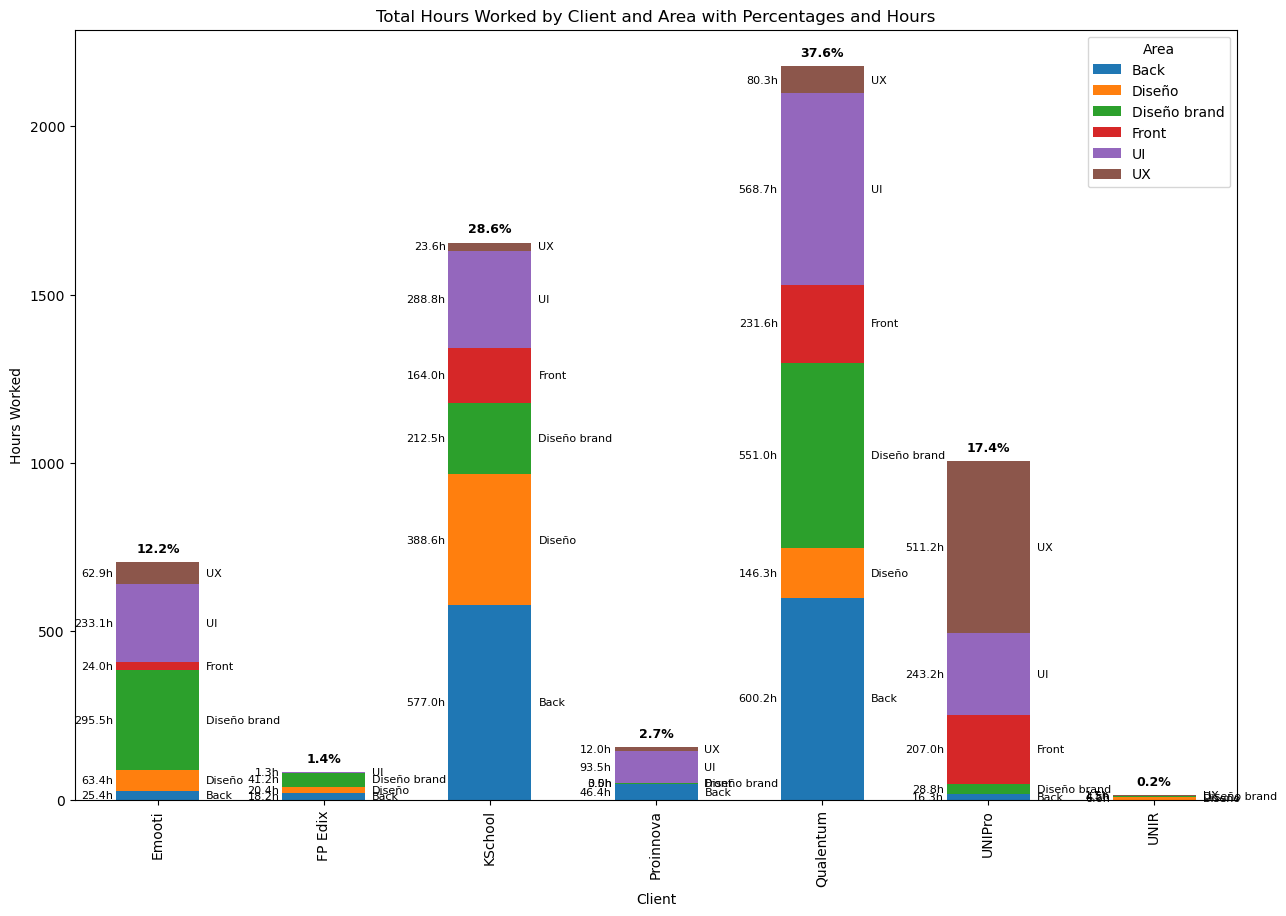

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga los datos
data = pd.read_csv('./horas.csv')

# Asegúrate de que las columnas 'Start' y 'Stop' existen y son convertibles a datetime
if 'Start' in data.columns and 'Stop' in data.columns:
    data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
    data['Stop'] = pd.to_datetime(data['Stop'], unit='ms', errors='coerce')
    data['Hours Worked'] = (data['Stop'] - data['Start']).dt.total_seconds() / 3600
else:
    raise ValueError("Las columnas 'Start' y 'Stop' no se encuentran en el DataFrame.")

# Mapeo de usuarios a áreas
user_to_area = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'esther': 'Front'
}

# Excluir a los usuarios no deseados y aplicar el mapeo
if 'Username' in data.columns:
    filtered_data = data[~data['Username'].isin(['Jesús Martín Mejías', 'Mery del Pozo'])]
    filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
else:
    raise ValueError("La columna 'Username' no se encuentra en el DataFrame.")

# Quitar el texto "(Tareas ITER)" de los nombres de los clientes
if 'Folder Name' in filtered_data.columns:
    filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(tareas ITER\)", "", regex=True).str.strip()
else:
    raise ValueError("La columna 'Folder Name' no se encuentra en el DataFrame.")

# Verifica que todas las columnas necesarias estén presentes antes de continuar
if not all(col in filtered_data.columns for col in ['Folder Name', 'Area', 'Hours Worked']):
    raise ValueError("Una o más columnas necesarias no están presentes en el DataFrame.")

# Agrupar los datos por cliente (Folder Name) y área
client_area_hours = filtered_data.groupby(['Folder Name', 'Area'])['Hours Worked'].sum().reset_index()

# Calcular el total de horas por cliente para los porcentajes
total_hours_by_client = client_area_hours.groupby('Folder Name')['Hours Worked'].sum().reset_index()
client_area_hours = client_area_hours.merge(total_hours_by_client, on='Folder Name', suffixes=('', '_Total'))

# Calcular el porcentaje de cada área respecto al total del cliente
client_area_hours['Percentage'] = client_area_hours['Hours Worked'] / client_area_hours['Hours Worked_Total'] * 100

# Preparar los datos para el gráfico de barras estratificado
pivot_data = client_area_hours.pivot(index='Folder Name', columns='Area', values='Hours Worked').fillna(0)

# Crear el gráfico de barras estratificado
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(15,10))

# Calcular el total general de horas para calcular los porcentajes
grand_total_hours = client_area_hours['Hours Worked'].sum()

# Añadir el nombre del área y el número de horas en cada estrato de las barras
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    
    if height > 0:  # Solo mostrar si la barra tiene altura
        client_name = pivot_data.index[int(x + width / 2)]
        
        # Filtrar el dataframe por el nombre del cliente y la altura de la barra
        filtered_df = client_area_hours[(client_area_hours['Folder Name'] == client_name) & 
                                        (abs(client_area_hours['Hours Worked'] - height) < 0.01)]
        
        if not filtered_df.empty:
            area = filtered_df['Area'].values[0]
            hours = filtered_df['Hours Worked'].values[0]
            
            # Añadir el nombre del área al medio derecho del estrato
            ax.annotate(area,
                        xy=(x + width, y + height/2),
                        xytext=(5, 0),
                        textcoords='offset points',
                        ha='left', va='center',
                        size=8)
            
            # Añadir el número de horas a la izquierda, centrado verticalmente en el estrato
            ax.annotate(f"{hours:.1f}h",
                        xy=(x, y + height/2),
                        xytext=(-2, 0),
                        textcoords='offset points',
                        ha='right', va='center',
                        size=8)

# Añadir el porcentaje total de horas de cada cliente en la parte superior de la barra
for index, (client, total_hours) in enumerate(total_hours_by_client.itertuples(index=False)):
    client_percentage = total_hours / grand_total_hours * 100
    ax.annotate(f"{client_percentage:.1f}%",
                xy=(index, total_hours),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                size=9, weight='bold')

plt.title('Total Hours Worked by Client and Area with Percentages and Hours')
plt.xlabel('Client')
plt.ylabel('Hours Worked')
plt.legend(title='Area')

# Mostrar el gráfico
plt.show()


# Grafico de barras por perfil

/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/522599457.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/522599457.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(tareas ITER\)", "", regex=True).str.strip()


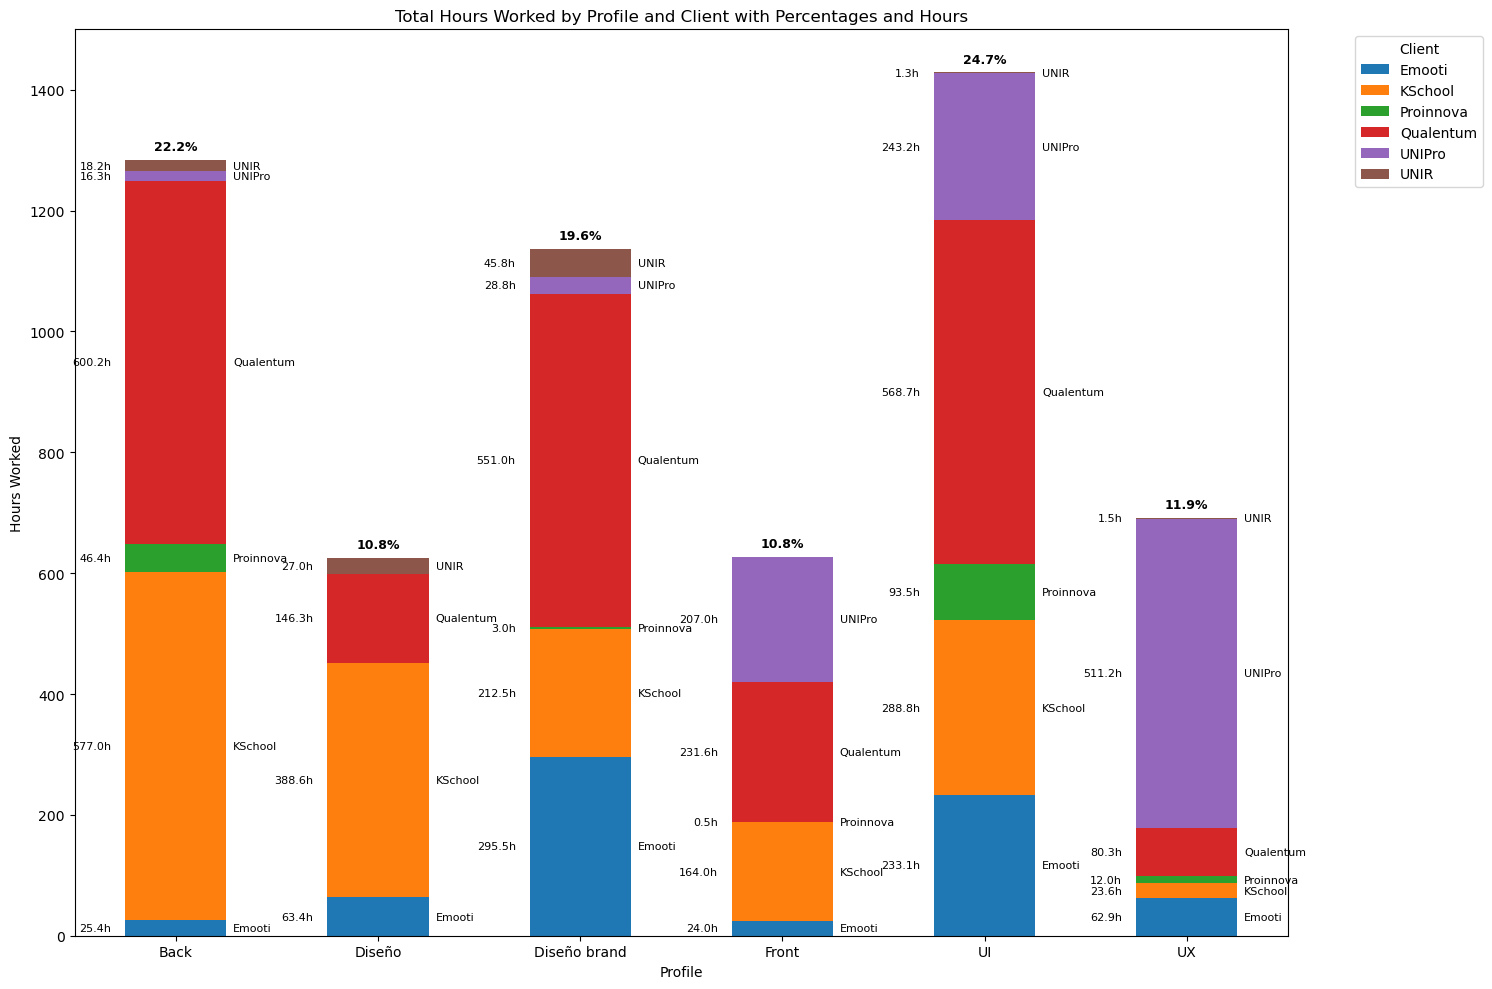

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga los datos
data = pd.read_csv('./horas.csv')

# Asegúrate de que las columnas 'Start' y 'Stop' existen y son convertibles a datetime
if 'Start' in data.columns and 'Stop' in data.columns:
    data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
    data['Stop'] = pd.to_datetime(data['Stop'], unit='ms', errors='coerce')
    data['Hours Worked'] = (data['Stop'] - data['Start']).dt.total_seconds() / 3600
else:
    raise ValueError("Las columnas 'Start' y 'Stop' no se encuentran en el DataFrame.")

# Mapeo de usuarios a áreas
user_to_area = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'esther': 'Front'
}

# Excluir a los usuarios no deseados y aplicar el mapeo
if 'Username' in data.columns:
    filtered_data = data[~data['Username'].isin(['Jesús Martín Mejías', 'Mery del Pozo'])]
    filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
else:
    raise ValueError("La columna 'Username' no se encuentra en el DataFrame.")

# Quitar el texto "(Tareas ITER)" de los nombres de los clientes
if 'Folder Name' in filtered_data.columns:
    filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(tareas ITER\)", "", regex=True).str.strip()
else:
    raise ValueError("La columna 'Folder Name' no se encuentra en el DataFrame.")

# Verifica que todas las columnas necesarias estén presentes antes de continuar
if not all(col in filtered_data.columns for col in ['Folder Name', 'Area', 'Hours Worked']):
    raise ValueError("Una o más columnas necesarias no están presentes en el DataFrame.")

# Agrupar los datos por área (perfil) y cliente
profile_client_hours = filtered_data.groupby(['Area', 'Folder Name'])['Hours Worked'].sum().reset_index()

# Identificar y sumar las horas de FP Edix y UNIR
profile_client_hours['Folder Name'] = profile_client_hours['Folder Name'].replace(['FP Edix', 'UNIR'], 'UNIR')
grouped_hours = profile_client_hours.groupby(['Area', 'Folder Name']).agg({'Hours Worked': 'sum'}).reset_index()

# Calcular el total general de horas para calcular los porcentajes
grand_total_hours = grouped_hours['Hours Worked'].sum()

# Preparar los datos para el gráfico de barras estratificado
pivot_data = grouped_hours.pivot(index='Area', columns='Folder Name', values='Hours Worked').fillna(0)

# Crear el gráfico de barras estratificado
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(15,10))

# Añadir el nombre del cliente y el número de horas en cada estrato de las barras
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    
    if height > 0:  # Solo mostrar si la barra tiene altura
        profile_name = pivot_data.index[int(x + width / 2)]
        
        # Filtrar el dataframe por el perfil y la altura de la barra
        filtered_df = grouped_hours[(grouped_hours['Area'] == profile_name) & 
                                    (abs(grouped_hours['Hours Worked'] - height) < 0.01)]
        
        if not filtered_df.empty:
            client = filtered_df['Folder Name'].values[0]
            hours = filtered_df['Hours Worked'].values[0]
            
            # Añadir el nombre del cliente al medio derecho del estrato
            ax.annotate(client,
                        xy=(x + width, y + height/2),
                        xytext=(5, 0),
                        textcoords='offset points',
                        ha='left', va='center',
                        size=8)
            
            # Añadir el número de horas a la izquierda, centrado verticalmente en el estrato
            ax.annotate(f"{hours:.1f}h",
                        xy=(x, y + height/2),
                        xytext=(-10, 0),
                        textcoords='offset points',
                        ha='right', va='center',
                        size=8)

# Añadir el porcentaje total de horas de cada perfil en la parte superior de la barra
for index, profile in enumerate(pivot_data.index):
    total_hours = pivot_data.loc[profile].sum()
    profile_percentage = total_hours / grand_total_hours * 100
    ax.annotate(f"{profile_percentage:.1f}%",
                xy=(index, total_hours),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                size=9, weight='bold')

plt.title('Total Hours Worked by Profile and Client with Percentages and Hours')
plt.xlabel('Profile')
plt.ylabel('Hours Worked')
plt.legend(title='Client', bbox_to_anchor=(1.05, 1), loc='upper left')

# Poner todas las leyendas del eje X en horizontal
plt.xticks(rotation=0)

# Ajustar el layout para acomodar la leyenda
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Treemap

In [66]:
import pandas as pd
import plotly.express as px

# Carga los datos
data = pd.read_csv('./horas.csv')

# Convertir las columnas de tiempo a datetime y calcular las horas trabajadas
if 'Start' in data.columns and 'Stop' in data.columns:
    data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
    data['Stop'] = pd.to_datetime(data['Stop'], unit='ms', errors='coerce')
    data['Hours Worked'] = (data['Stop'] - data['Start']).dt.total_seconds() / 3600
else:
    raise ValueError("Las columnas 'Start' y 'Stop' no se encuentran en el DataFrame.")

# Mapeo de usuarios a áreas
user_to_area = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'esther': 'Front'
}

# Excluir a los usuarios no deseados y aplicar el mapeo
if 'Username' in data.columns:
    filtered_data = data[~data['Username'].isin(['Jesús Martín Mejías', 'Mery del Pozo'])]
    filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
else:
    raise ValueError("La columna 'Username' no se encuentra en el DataFrame.")

# Quitar el texto "(Tareas ITER)" de los nombres de los clientes
if 'Folder Name' in filtered_data.columns:
    filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(tareas ITER\)", "", regex=True).str.strip()
else:
    raise ValueError("La columna 'Folder Name' no se encuentra en el DataFrame.")

# Agrupar los datos por área (perfil) y cliente
grouped_hours = filtered_data.groupby(['Folder Name', 'Area'])['Hours Worked'].sum().reset_index()

# Crear un Treemap
fig = px.treemap(grouped_hours, path=['Folder Name', 'Area'], values='Hours Worked',
                 color='Hours Worked', color_continuous_scale='RdYlGn', 
                 title='Treemap of Hours Worked by Profile and Client')

# Mostrar el gráfico
fig.show()


/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_84542/945720746.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_84542/945720746.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Mapa de calor

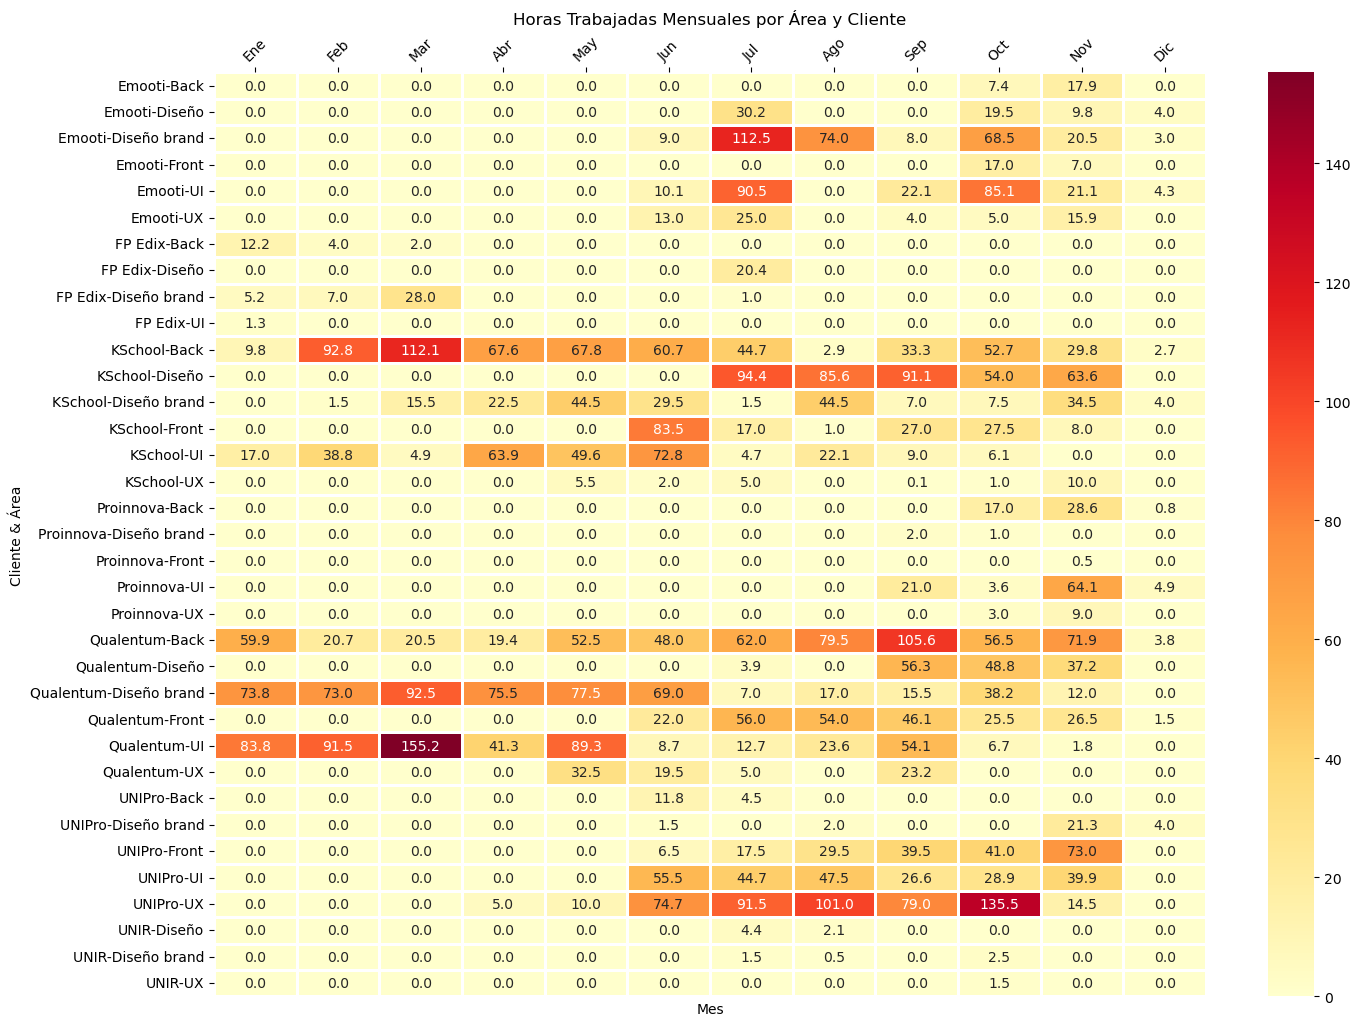

,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
Client-Area,,,,,,,,,,,,
Emooti-Back,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.445693,17.945261,0.000000
Emooti-Diseño,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.176407,0.000000,0.000000,19.500000,9.750000,4.000000
Emooti-Diseño brand,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,112.500000,74.000000,8.000000,68.500000,20.500000,3.000000
Emooti-Front,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,7.000000,0.000000
Emooti-UI,0.000000,0.000000,0.000000,0.000000,0.000000,10.128331,90.465119,0.000000,22.052296,85.076870,21.056382,4.271382
Emooti-UX,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,25.000000,0.000000,4.000000,5.000000,15.916667,0.000000
FP Edix-Back,12.250000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FP Edix-Diseño,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.406539,0.000000,0.000000,0.000000,0.000000,0.000000
FP Edix-Diseño brand,5.250000,7.000000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las abreviaturas de los nombres de los meses en español
meses_es = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Carga los datos
data = pd.read_csv('./horas.csv')

# Convertir las columnas de tiempo a datetime y calcular las horas trabajadas
data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
data['Hours Worked'] = data['Time Tracked'] / 3600000

# Definir el mapeo de usuarios a áreas
user_to_area = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'esther': 'Front'
}

# Asegúrate de que tienes un DataFrame filtrado
filtered_data = data.copy()

# Aplicar el mapeo al dataframe
filtered_data['Area'] = filtered_data['Username'].map(user_to_area)

# Quitar el texto "(Tareas ITER)" de los nombres de los clientes
filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(tareas ITER\)", "", regex=True).str.strip()

# Crear etiquetas combinadas de cliente y área para el eje Y
filtered_data['Client-Area'] = filtered_data['Folder Name'] + "-" + filtered_data['Area']

# Asegúrate de que las columnas 'Year' y 'MonthNum' existen
filtered_data['Year'] = filtered_data['Start'].dt.year
filtered_data['MonthNum'] = filtered_data['Start'].dt.month

# Ordenar por año y mes antes de pivotear
filtered_data.sort_values(by=['Year', 'MonthNum'], inplace=True)

# Crear una nueva tabla pivote para el mapa de calor
area_heatmap_data = filtered_data.pivot_table(values='Hours Worked', index='Client-Area', columns='MonthNum', fill_value=0, aggfunc=np.sum)

# Convertir los números de mes en la tabla pivote a nombres en español para la visualización
new_columns = [meses_es[month_num-1] for month_num in area_heatmap_data.columns]
area_heatmap_data.columns = new_columns

# Configurar el tamaño del gráfico
plt.figure(figsize=(16, 12))

# Crear el mapa de calor para los datos de área
sns.heatmap(area_heatmap_data, annot=True, fmt=".1f", linewidths=1, cmap="YlOrRd")

# Títulos y etiquetas
plt.title('Horas Trabajadas Mensuales por Área y Cliente')
plt.ylabel('Cliente & Área')
plt.xlabel('Mes')

# Configurar los ticks del eje X para que aparezcan en la parte superior
plt.tick_params(axis='x', bottom=False, top=True, labelbottom=False, labeltop=True)

# Ajustar las etiquetas del eje X para mostrar los nombres de los meses en español
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

area_heatmap_data
